In [94]:
import numpy as np
import matplotlib.pyplot as plt

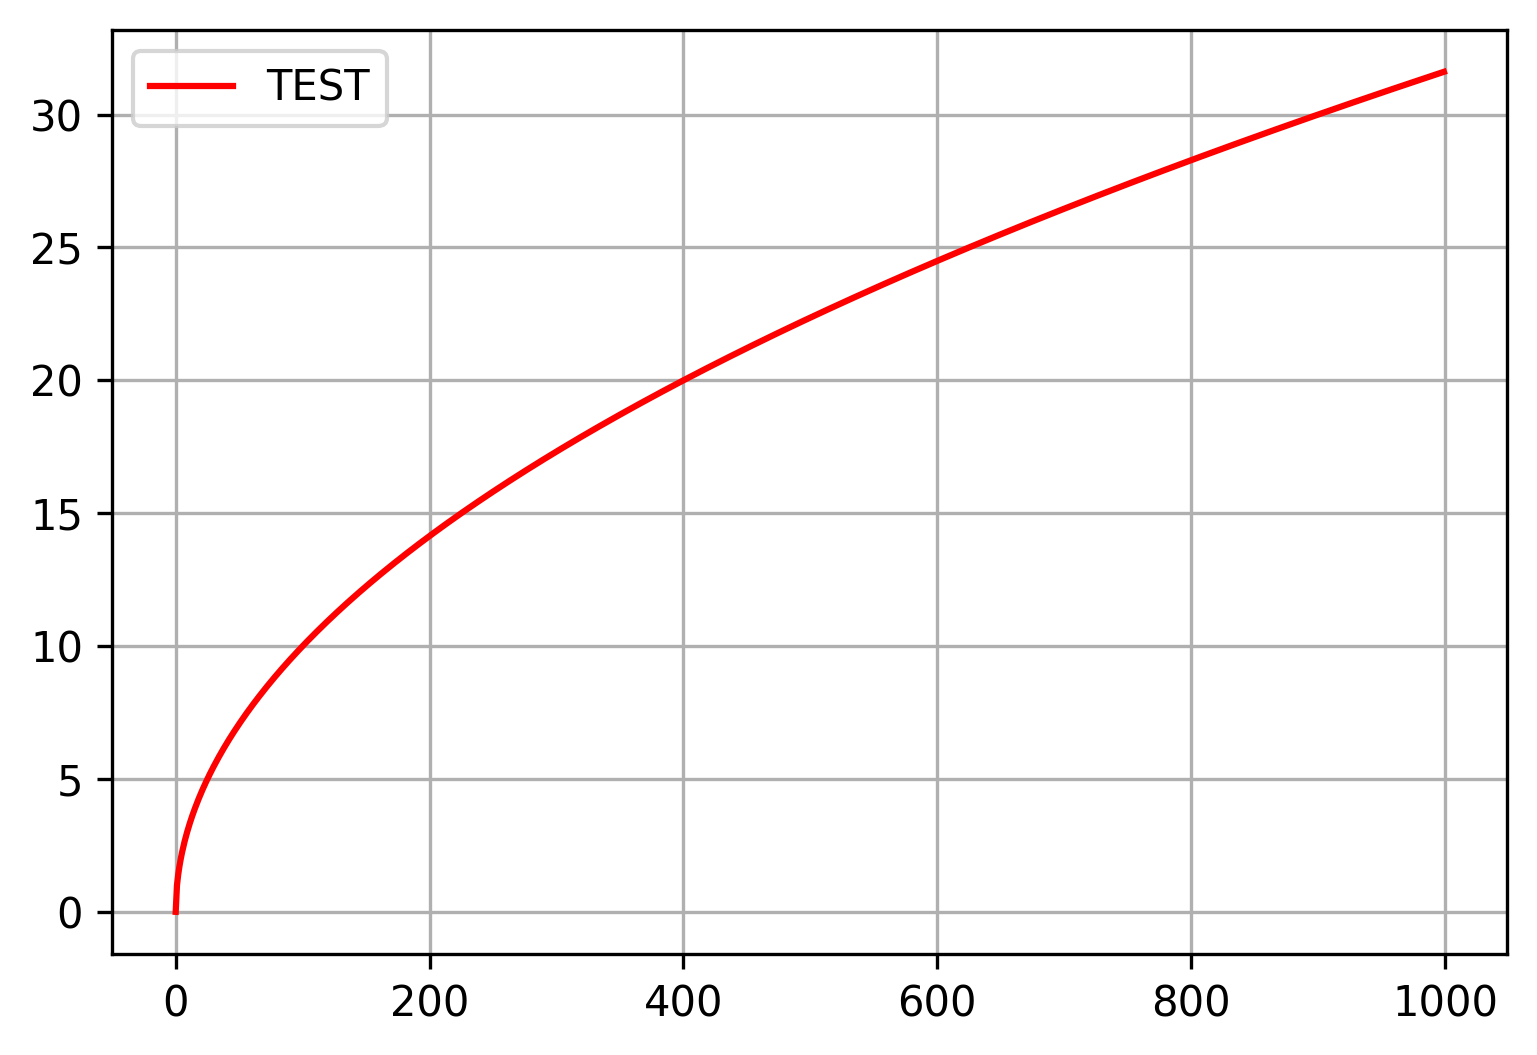

In [95]:
X = np.arange(0, 1000, 1)
Y = np.sqrt(X)

plt.figure(figsize=(6,4), dpi=300)
plt.plot(X, Y, 'r-', label="TEST")
plt.grid('minor')
plt.legend()


(0.0, 200.0)

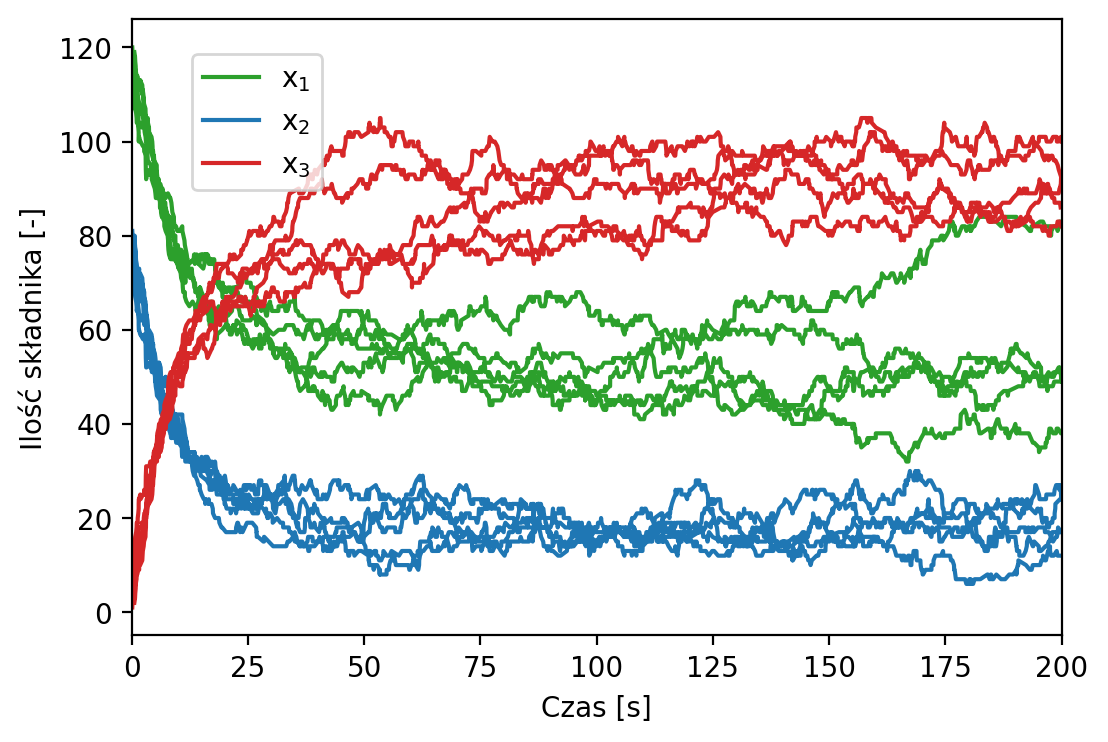

In [96]:
data = np.loadtxt("stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

Pmax = 1
tmax = 200

diffs = np.append(np.diff(data[:,1]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,1] = np.nan

diffs = np.append(np.diff(data[:,2]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,2] = np.nan

diffs = np.append(np.diff(data[:,3]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,3] = np.nan

plt.figure(figsize=(6,4), dpi=200)
for i in range(Pmax):
    plt.plot(data[:,0], data[:,1], color = "tab:green", label="x1")
    plt.plot(data[:,0], data[:,2], color = "tab:blue", label="x2")
    plt.plot(data[:,0], data[:,3], color = "tab:red", label="x3")
plt.legend([r"x$_1$", r"x$_2$", r"x$_3$"], bbox_to_anchor=(0.05,0.70))
plt.xlabel("Czas [s]")
plt.ylabel("Ilość składnika [-]")
plt.xlim([0, 200])

(0.0, 200.0)

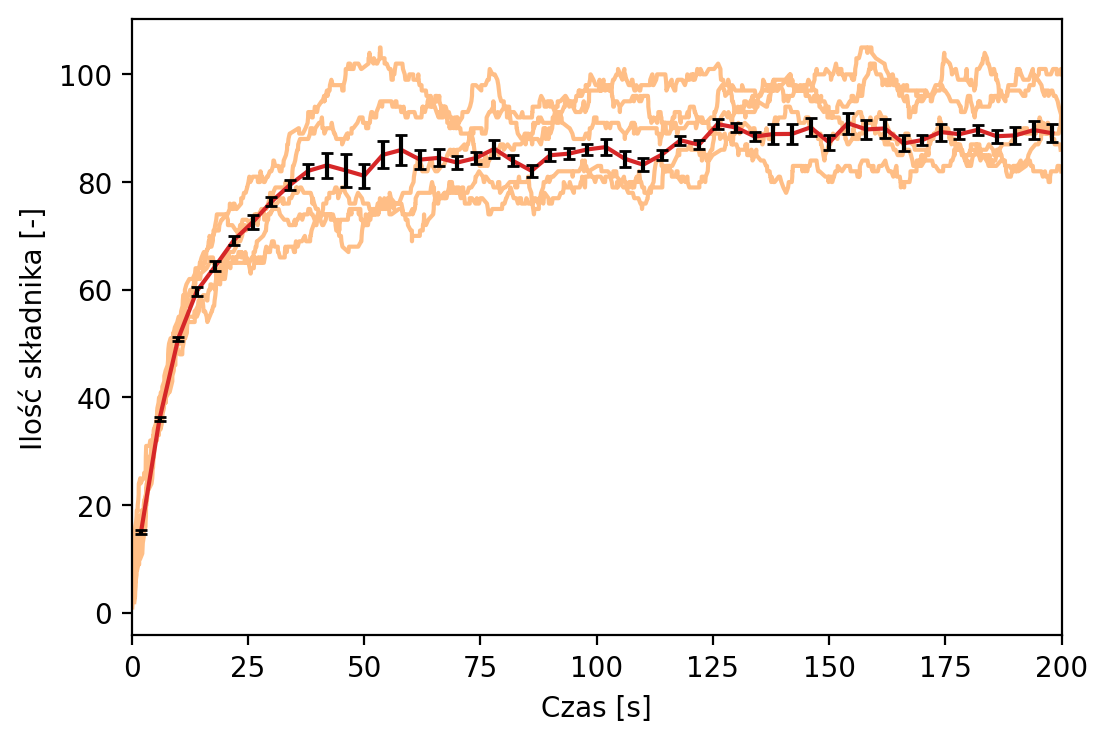

In [97]:
data = np.loadtxt("stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

Pmax = 1
tmax = 200

diffs = np.append(np.diff(data[:,1]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,1] = np.nan

diffs = np.append(np.diff(data[:,2]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,2] = np.nan

diffs = np.append(np.diff(data[:,3]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,3] = np.nan

plt.figure(figsize=(6,4), dpi=200)
for i in range(Pmax):
    plt.plot(data[:,0], data[:,3], color = "tab:orange", alpha=0.5)

data = np.loadtxt("hist.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

plt.plot(data[:,0], data[:,1], color='tab:red')
plt.errorbar(data[:,0], data[:,1], data[:,2], linestyle='', color='tab:red', capthick=True, capsize=2, ecolor='k')
plt.xlabel("Czas [s]")
plt.ylabel("Ilość składnika [-]")
plt.xlim([0, 200])

(0.0, 200.0)

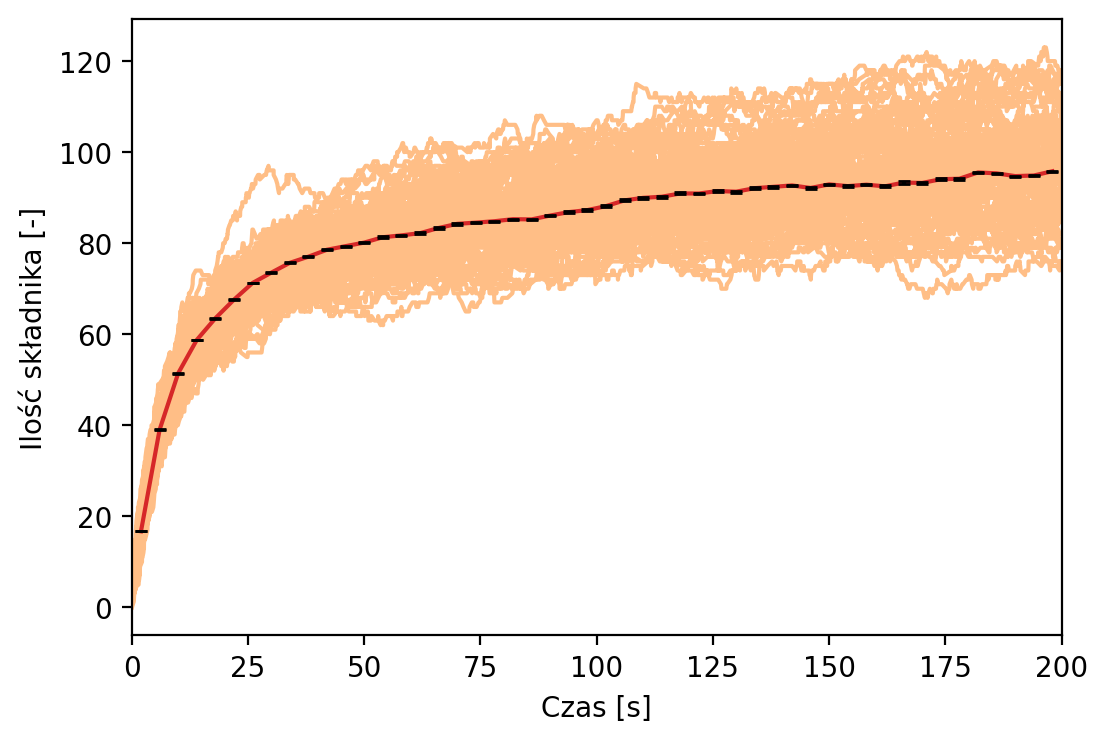

In [98]:
data = np.loadtxt("stat2.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

Pmax = 1
tmax = 200

diffs = np.append(np.diff(data[:,1]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,1] = np.nan

diffs = np.append(np.diff(data[:,2]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,2] = np.nan

diffs = np.append(np.diff(data[:,3]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,3] = np.nan



plt.figure(figsize=(6,4), dpi=200)
for i in range(Pmax):
    plt.plot(data[:,0], data[:,3], color = "tab:orange", alpha=0.5)

data = np.loadtxt("hist2.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

plt.plot(data[:,0], data[:,1], color='tab:red')
plt.errorbar(data[:,0], data[:,1], data[:,2], linestyle='', color='tab:red', capthick=True, capsize=2, ecolor='k')
plt.xlabel("Czas [s]")
plt.ylabel("Ilość składnika [-]")
plt.xlim([0, 200])